<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L232023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - 분류
        
        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [ ]:
recipes = pd.read_csv('./drive/MyDrive/data/recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


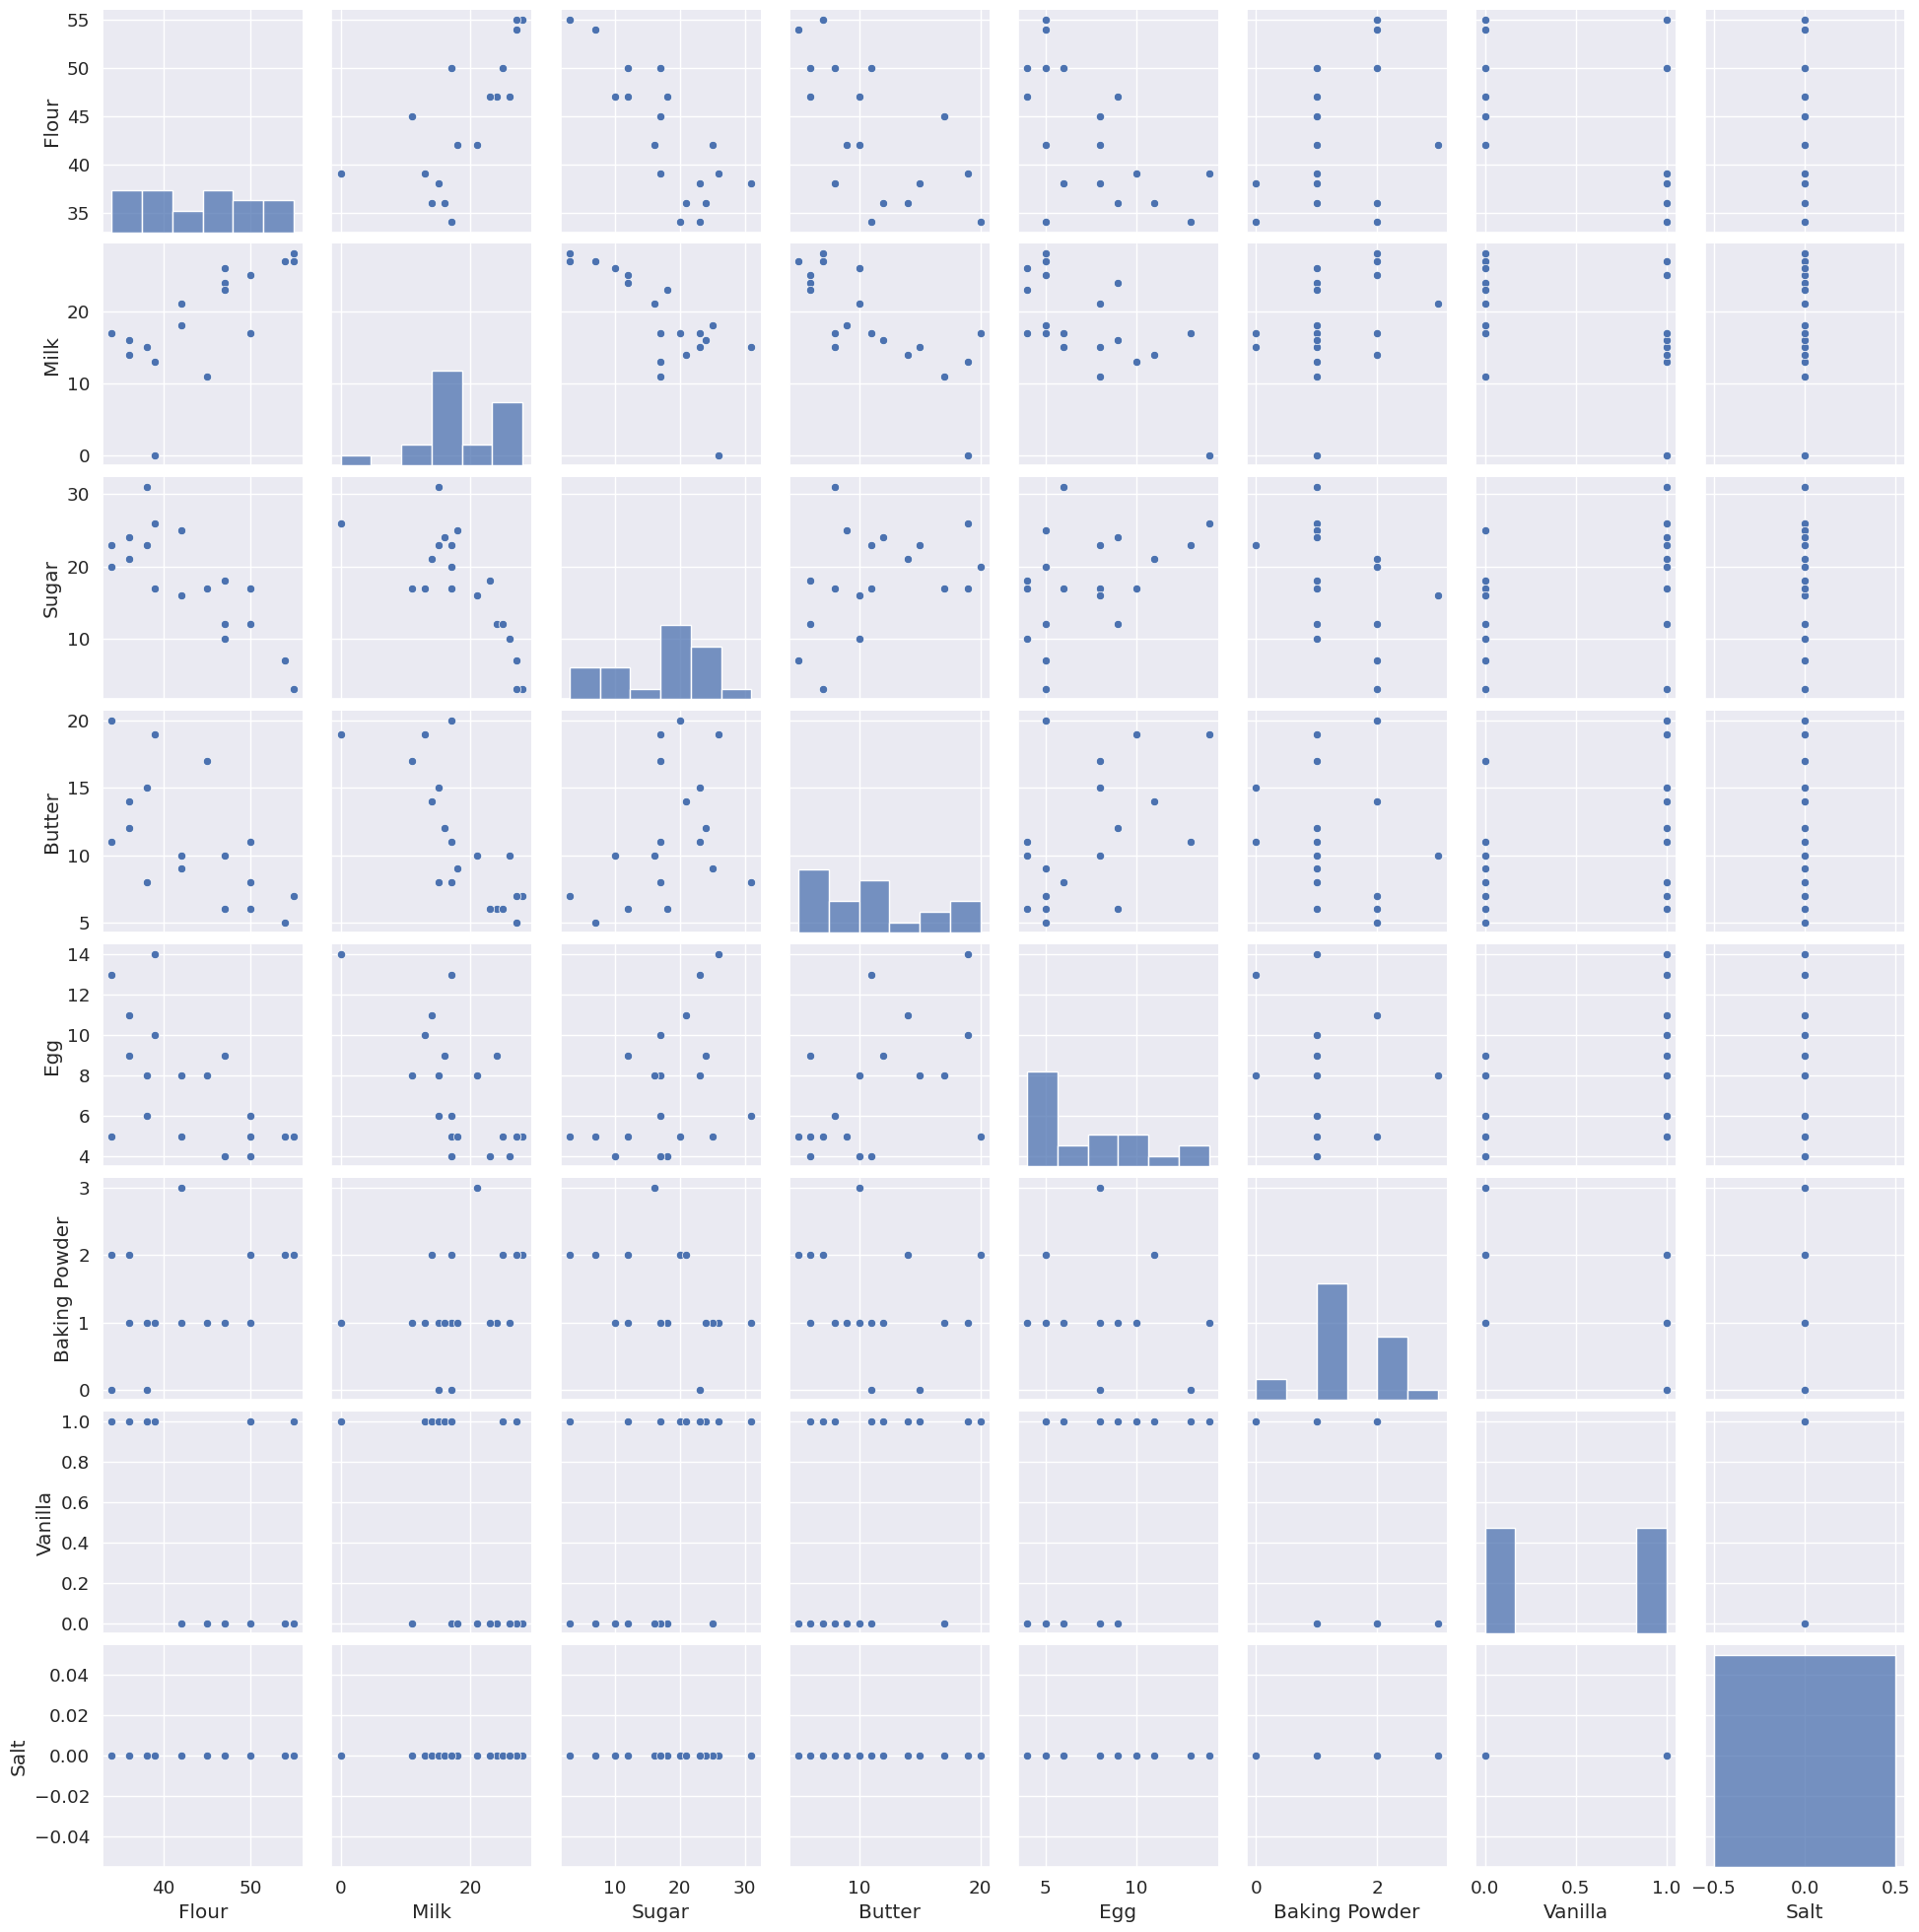

In [ ]:
sns.pairplot(recipes)

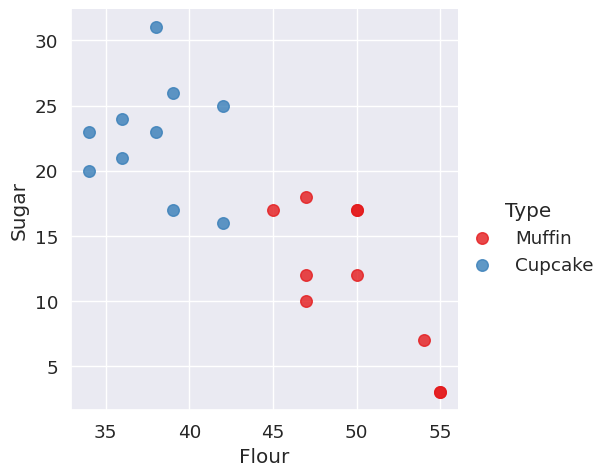

In [ ]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})

In [ ]:
X_features = recipes.loc[:, ['Flour', 'Sugar']]
y_label = np.where(recipes['Type']=='Muffin', 0, 1)

In [ ]:
X_features

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [ ]:
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_features, y_label)

SVC(kernel='linear')

In [ ]:
model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [ ]:
model.intercept_

array([28.99296292])

In [ ]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [ ]:
w = model.coef_[0]

In [ ]:
w

array([-6.66503014e-01, -7.77156117e-16])

In [ ]:
a = -w[0] / w[1]

In [ ]:
xx = np.linspace(30, 60)

In [ ]:
xx

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

In [ ]:
model.intercept_[0]

28.992962922374236

In [ ]:
yy = a*xx - (model.intercept_[0]/w[1]) ##hyperline

In [ ]:
vec = model.support_vectors_[0]

In [ ]:
vec # (x, y) => y = ax + b ==> b = y - ax

array([45., 17.])

In [ ]:
yy_down = a*xx + (vec[1] - a * vec[0]) # vec[1] ==y , vec[0] == x

In [ ]:
vec = model.support_vectors_[-1]

In [ ]:
yy_up = a*xx + (vec[1] - a*vec[0])

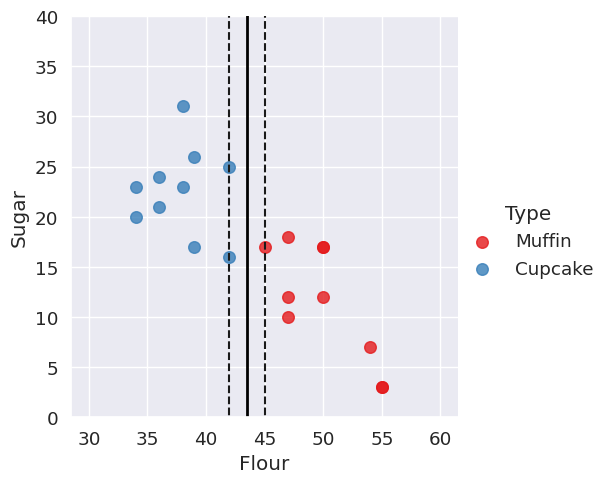

In [ ]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim([0, 40])
plt.show()

In [ ]:
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]]))==0:
        print('Muffin!')
    else:
        print('Cupcake!')

In [ ]:
muffin_or_cupcake(50, 20)

Muffin!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


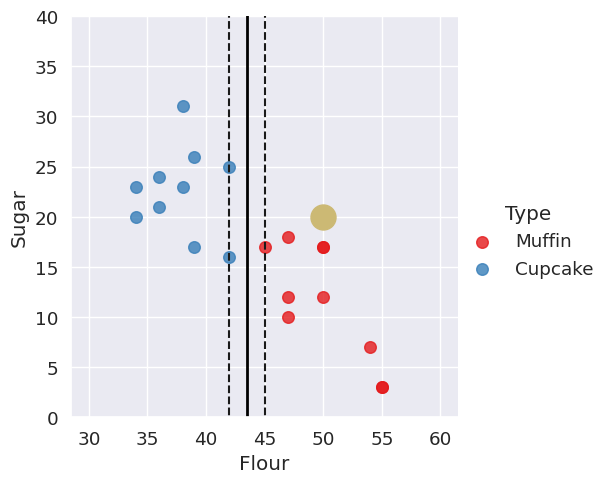

In [ ]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.plot(50, 20, 'yo', markersize='18')
plt.ylim([0, 40])
plt.show()

#Pipe 사용

- 추정기와 객체 이름을 튜플로 만들어 준다. => 객체 이름을 적지 않을때는 make_pipeline을 사용한다.

- 각 단계는 최대 4단계까지 가능하며, 마지막 단계를 제외한 앞에 3단계는 transform 메서드가 있는 객체이어야 한다.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cancer = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)

0.972027972027972

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
grid.best_score_

0.9812311901504789

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [ ]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.972027972027972

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [ ]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

In [ ]:
param_grid = {'svm__C':[0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9812311901504789
0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}


make_pipe 사용 예

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=5))

In [ ]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.965034965034965

In [ ]:
pipe.steps

[('minmaxscaler', MinMaxScaler()),
 ('randomforestclassifier', RandomForestClassifier(max_depth=5))]

In [ ]:
pipe.steps[0]

('minmaxscaler', MinMaxScaler())

In [ ]:
pipe.steps[0][1]

MinMaxScaler()

In [ ]:
pipe.steps[0][1].transform(X_test)

array([[0.30380046, 0.44854772, 0.30993021, ..., 0.70651051, 0.39818648,
        0.36639118],
       [0.29480808, 0.64481328, 0.27855711, ..., 0.20685498, 0.17327025,
        0.08421881],
       [0.33314402, 0.24688797, 0.31649506, ..., 0.28301757, 0.11255667,
        0.07910272],
       ...,
       [0.25363245, 0.10622407, 0.24289959, ..., 0.36858422, 0.30455352,
        0.13695396],
       [0.30995314, 0.05103734, 0.30488563, ..., 0.25514984, 0.22570471,
        0.11065197],
       [0.59676274, 0.35020747, 0.60058047, ..., 0.77402687, 0.40961955,
        0.24393283]])

In [ ]:
pipe.named_steps

{'minmaxscaler': MinMaxScaler(),
 'randomforestclassifier': RandomForestClassifier(max_depth=5)}

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import mglearn

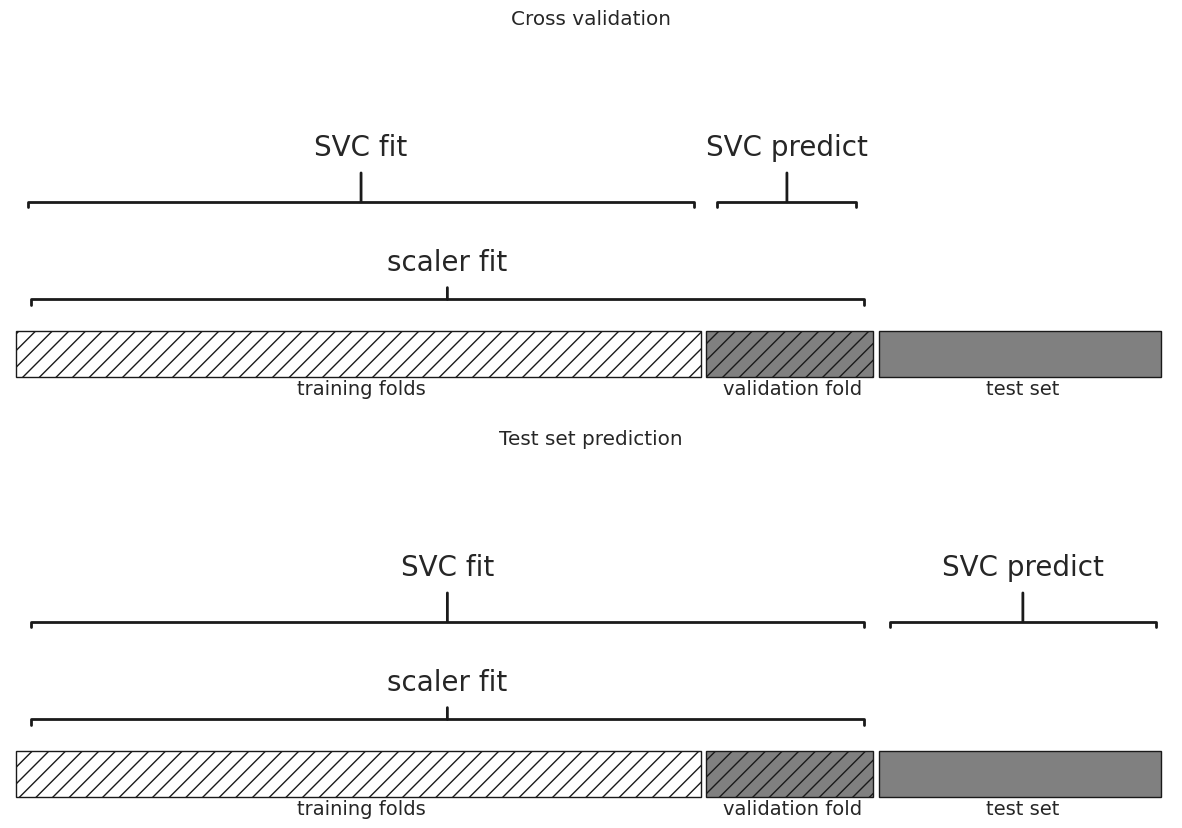

In [ ]:
mglearn.plots.plot_improper_processing()

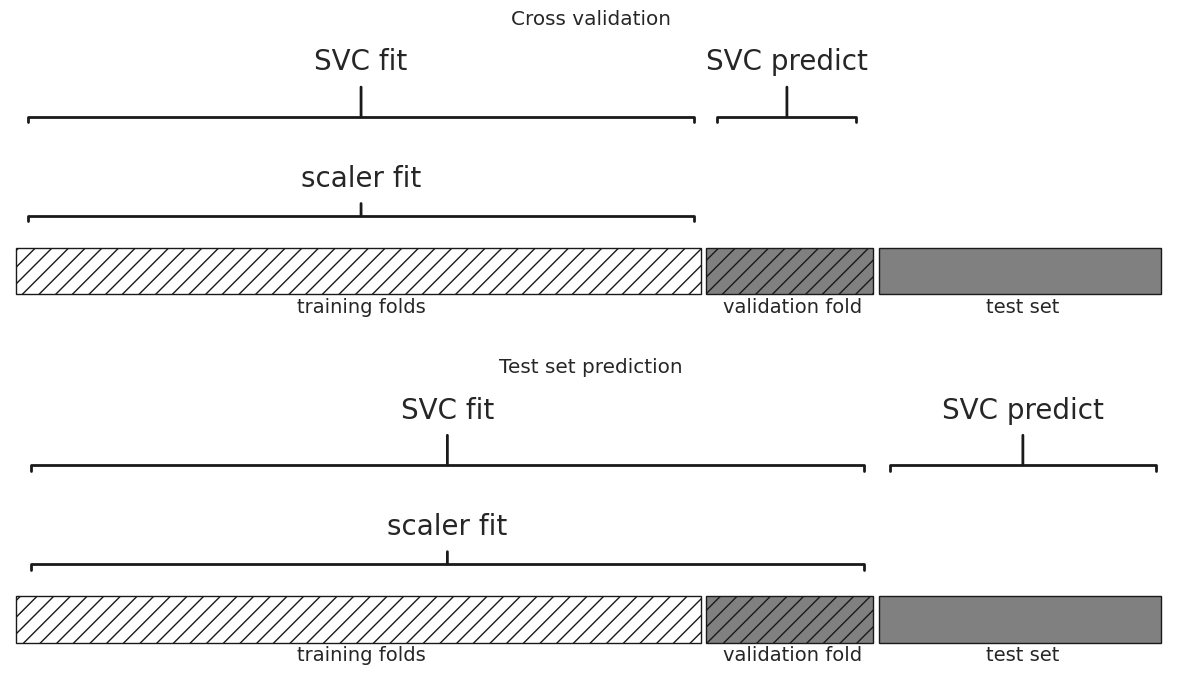

In [ ]:
mglearn.plots.plot_proper_processing()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline([('prepro', StandardScaler()), ('clf', RandomForestClassifier())])

In [ ]:
pipe.steps

[('prepro', StandardScaler()), ('clf', RandomForestClassifier())]

In [ ]:
param_grid = [
    {'clf':[SVC()], 'prepro':[StandardScaler(), MinMaxScaler()],
     'clf__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'clf__C':[0.1, 1, 10, 100]},
    {'clf':[RandomForestClassifier(n_estimators=500)], 'prepro':[None],
        'clf__max_features':[1, 2, 3, 5, 7, 9]}
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepro', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid=[{'clf': [SVC(C=10, gamma=0.01)],
                          'clf__C': [0.1, 1, 10, 100],
                          'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'prepro': [StandardScaler(), MinMaxScaler()]},
                         {'clf': [RandomForestClassifier(n_estimators=500)],
                          'clf__max_features': [1, 2, 3, 5, 7, 9],
                          'prepro': [None]}])

In [ ]:
grid.best_params_

{'clf': SVC(C=10, gamma=0.01),
 'clf__C': 10,
 'clf__gamma': 0.01,
 'prepro': StandardScaler()}

In [ ]:
grid.best_score_

0.9858823529411765

In [ ]:
grid.score(X_test, y_test)

0.9790209790209791

#SVM 에서 ROC_AUC_SCORE 산출

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def score_auc(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    pred_proba = model.predict_proba(X_test)
    print(roc_auc_score(y_test, pred_proba[:, 1]))

In [ ]:
model = SVC(probability=True)

In [ ]:
score_auc(model, X_train, X_test, y_train, y_test)

0.9370629370629371
0.9842767295597485


#예제 : Stander 고객만족도 예측

In [ ]:
ls ./drive/MyDrive/data/sant*

./drive/MyDrive/data/santander_train.csv


In [ ]:
df = pd.read_csv('./drive/MyDrive/data/santander_train.csv', encoding='latin-1')

In [ ]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


Target

1 - 불만

0 - 만족

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
pd.options.display.max_info_columns=400

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    ID                             76020 non-null  int64  
 1    var3                           76020 non-null  int64  
 2    var15                          76020 non-null  int64  
 3    imp_ent_var16_ult1             76020 non-null  float64
 4    imp_op_var39_comer_ult1        76020 non-null  float64
 5    imp_op_var39_comer_ult3        76020 non-null  float64
 6    imp_op_var40_comer_ult1        76020 non-null  float64
 7    imp_op_var40_comer_ult3        76020 non-null  float64
 8    imp_op_var40_efect_ult1        76020 non-null  float64
 9    imp_op_var40_efect_ult3        76020 non-null  float64
 10   imp_op_var40_ult1              76020 non-null  float64
 11   imp_op_var41_comer_ult1        76020 non-null  float64
 12   imp_op_var41_comer_ult3       

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [ ]:
73012/3008

24.272606382978722

In [ ]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [ ]:
df.var3.value_counts(normalize=True)*100

 2         97.559853
 8          0.181531
-999999     0.152591
 9          0.144699
 3          0.142068
             ...    
 231        0.001315
 188        0.001315
 168        0.001315
 135        0.001315
 87         0.001315
Name: var3, Length: 208, dtype: float64

In [ ]:
df['var3'].replace(-999999, 2, inplace=True)

In [ ]:
df.var3.value_counts(normalize=True)*100

2      97.712444
8       0.181531
9       0.144699
3       0.142068
1       0.138122
         ...    
231     0.001315
188     0.001315
168     0.001315
135     0.001315
87      0.001315
Name: var3, Length: 207, dtype: float64

In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
X_features = df.iloc[:, :-1]
y_labels = df.iloc[:, -1]

In [ ]:
X_features.shape, y_labels.shape

((76020, 369), (76020,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [ ]:
60816*0.96

58383.36

In [ ]:
y_train.value_counts(normalize=True)*100

0    96.096422
1     3.903578
Name: TARGET, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

0    95.830045
1     4.169955
Name: TARGET, dtype: float64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=156)
X_resampled, y_resampled = rus.fit_resample(X_features, y_labels)

In [ ]:
X_resampled.shape, y_resampled.shape

((6016, 369), (6016,))

In [ ]:
y_resampled.value_counts()

0    3008
1    3008
Name: TARGET, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4812, 369), (1204, 369), (4812,), (1204,))

In [ ]:
svc = SVC(probability=True, random_state=156)
score_auc(svc, X_train, X_test, y_train, y_test)

0.49667774086378735
0.49673925042777506


In [ ]:
y_labels.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

---
---
---
---
over sampling 예

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=156)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [ ]:
X_train.sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

<ipython-input-120-845abf127ab7>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.sampled, y_train_sampled = smote.fit_resample(X_train, y_train)


In [ ]:
y_train_sampled.value_counts(), y_train.value_counts()

(0    58442
 1    58442
 Name: TARGET, dtype: int64,
 0    58442
 1     2374
 Name: TARGET, dtype: int64)

---
---
---
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [ ]:
xgbc = XGBClassifier(scale_pos_weight=24, random_state=156)
score_auc(xgbc, X_train, X_test, y_train, y_test)

0.8355695869508024
0.8142227558030524


#회귀

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


<Axes: xlabel='x', ylabel='y'>

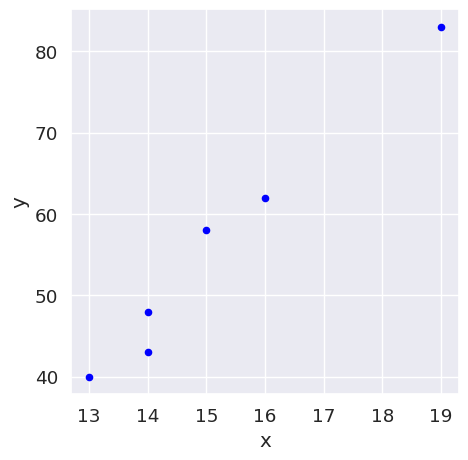

In [ ]:
data.plot(kind="scatter",
          x='x',
          y='y',
          figsize=(5,5),
          color="blue")

In [ ]:
X = pd.DataFrame(data['x'])
lr = linear_model.LinearRegression()
lr.fit(X, data.y)

LinearRegression()

In [ ]:
lr.coef_

array([7.32846715])

In [ ]:
lr.intercept_

-55.48175182481753

In [ ]:
prediction=lr.predict(X)

In [ ]:
prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

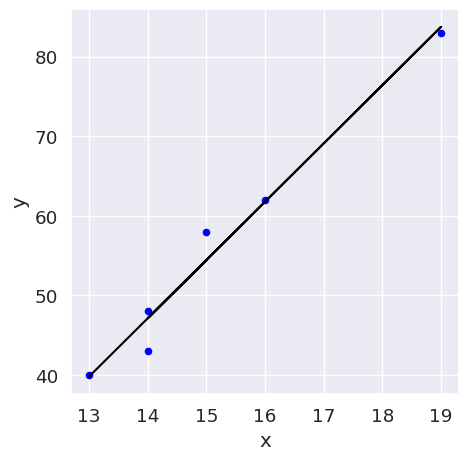

In [ ]:
data.plot(kind="scatter",
          x='x',
          y='y',
          figsize=(5,5),
          color="blue")
plt.plot(data.x, prediction, color='black')

In [ ]:
np.sum((data.y-prediction)**2)/6

5.172749391727503